# Proyecto: 'CDMX Un aire no tan bueno'
## Licenciatura en Ciencia de Datos
### Instituto de Investigaciones en Matemáticas Aplicadas y en Sistemas (IIMAS)
### Universidad Nacional Autónoma de México

Integrantes:

- Ortega Ibarra Jaime Jesús
- Martiñón Luna Jonathan José

----
# Modelo.

## Índice de contenidos
* [Importando librerías](#E1)
* [Lectura de Datos](#E2)
* [Generando Funciones](#E3)
* [Separando Datos](#E4)
* [Correlaciones](#E7)
* [Creando Modelo](#E5)

----
<a name="E1"></a>
## Importando librerías necesarias

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier
import seaborn as sns

----
<a name="E2"></a>
## Lectura de datos

In [2]:
data = pd.read_csv('./data_preprocessed.csv')

In [3]:
data.dropna(inplace=True)
data.reset_index(drop=True,inplace=True)
data.head()

,Nombre de estación,Clave de estación,Clave Parámetro,Nombre de parámetro,Unidades parámetros,Valor,ID Unidad,Clave de unidad,Alcaldia,Dia,Mes,Año,Hora,Tiraderos,Escuelas_publicas,Escuelas_privadas,Mercados,Parquimetros,Areas_verdes,Estacion_climatologica
0,Santa fe,SFE,NO2,Dióxido de nitrógeno,1,18.0,1,ppb,Cuajimalpa,15,2,2020,20,5,35,172,5,0,448,1
1,Milpa Alta,MPA,O3,Ozono,1,24.0,1,ppb,Milpa Alta,15,2,2020,20,13,28,32,10,0,130,1
2,Mguel Hidalgo,MGH,O3,Ozono,1,27.0,1,ppb,Miguel Hidalgo,15,2,2020,20,69,137,223,19,1382,925,1
3,Pedregal,PED,O3,Ozono,1,19.0,1,ppb,Alvaro Obregon,15,2,2020,20,77,172,321,16,83,721,1
4,Centro de Ciencias de la Atmósfera,CCA,O3,Ozono,1,13.0,1,ppb,Coyoacan,15,2,2020,20,68,163,290,22,0,1806,1


----
<a name="E3"></a>
## Generando Funciones

In [31]:
def Best_MAE_regression(features_names, data, var='Valor'):
    '''
    features_names:  Lista con los nombres de columnas que serán consideradas
                     Features.
    data:            DataFrame que contiene las features_names como columnas
                     y además una columna llamada 'valor'
    '''
    or_feat = features_names
    # Obtenemos la cantidad de iteraciones a realizar
    n = len(features_names)
    MSE= 10 # inicializamos nuestro error 
    
    
    Comb_features=[]
    
    print("Evaluando features....")
    
    # Vamos a generar combinaciones entre Features:
    # [a,b,c]
    # [b,c]
    # [c]
    for j in range(n):
        
        if j != 0:
            features_names = features_names[1:]
            
        for i in range(len(features_names)-1):
        
            new_features = features_names[:i+1]

            #Generamos nuestras X
            X = data[new_features]
            #Nuestra y es siempre la misma
            y = data[var]
            
            #Dividimos en conjunto de entrenamiento y prueba
            X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                                test_size=0.2, random_state=42)
            
            #Generamos nuestro modelo
            regression = LinearRegression().fit(X_train,y_train)
            
            y_pred = regression.predict(X_test)

            #Calculamos nuestro MSE
            new_MSE = mean_squared_error(y_test, y_pred)
#             print(new_MSE)
            #Si el nuevo error es menor al menor que tenemos, se sustituye
            dif = MSE- new_MSE
            if dif >0.03:

                # Guardamos la combinación de Features óptima
                Comb_features = new_features
                #Actualizamos el MSE
                MSE = new_MSE
    if len(Comb_features)!=0:
        delete = []
        # Mostramos cuáles fueron las variables que al final no se consideraron
        for feat in or_feat:
            if feat not in Comb_features:
                delete.append(feat)

        print(f"\nEl mejor modelo fue usando las features: {Comb_features}")
        print(f"\nSe eliminaron {n-len(Comb_features)} features: {delete}")
        print(f"\nCon un MSE: {MSE}")
    else:
        print("-------------------")
        print("ERROR")
        print("MSE:",new_MSE)
    
    return Comb_features

----
<a name="E4"></a>
## Separando Datos

### Separamos los datos para generar 7 modelos

In [5]:
clave_2_Nombre_Param = dict(zip(data['Clave Parámetro'].unique(),data['Nombre de parámetro'].unique()))

In [6]:
Alcaldia = ['Cuajimalpa', 'Milpa Alta', 'Miguel Hidalgo', 'Alvaro Obregon',
       'Coyoacan', 'Tlahuac', 'Xochimilco', 'Iztapalapa', 'Benito Juarez',
       'Gustavo A. Madero', 'Azcapotzalco', 'Cuauhtemoc', 'Iztacalco',
       'Venustiano Carranza', 'Tlalpan']

alc_2_clave = {Alcaldia[i]:i+1 for i in range(len(Alcaldia))}
clave_2_alc = {i+1:Alcaldia[i] for i in range(len(Alcaldia))}

In [7]:
data = pd.get_dummies(data, columns=['Alcaldia'])
data.drop(['Nombre de estación','Clave de estación','Clave de unidad','Nombre de parámetro',
           'ID Unidad','Unidades parámetros','Dia','Mes','Año',
           'Estacion_climatologica'],axis=1,inplace=True)

In [8]:
data.head(2)

,Clave Parámetro,Valor,Hora,Tiraderos,Escuelas_publicas,Escuelas_privadas,Mercados,Parquimetros,Areas_verdes,Alcaldia_Alvaro Obregon,...,Alcaldia_Cuauhtemoc,Alcaldia_Gustavo A. Madero,Alcaldia_Iztacalco,Alcaldia_Iztapalapa,Alcaldia_Miguel Hidalgo,Alcaldia_Milpa Alta,Alcaldia_Tlahuac,Alcaldia_Tlalpan,Alcaldia_Venustiano Carranza,Alcaldia_Xochimilco
0,NO2,18.0,20,5,35,172,5,0,448,0,...,0,0,0,0,0,0,0,0,0,0
1,O3,24.0,20,13,28,32,10,0,130,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
No2 = data[data['Clave Parámetro']=='NO2'].reset_index(drop=True)
O3 = data[data['Clave Parámetro']=='O3'].reset_index(drop=True)
So2 = data[data['Clave Parámetro']=='SO2'].reset_index(drop=True)
Pm10 = data[data['Clave Parámetro']=='PM10'].reset_index(drop=True)
Pm5 = data[data['Clave Parámetro']=='PM2.5'].reset_index(drop=True)
Co = data[data['Clave Parámetro']=='CO'].reset_index(drop=True)
No = data[data['Clave Parámetro']=='NO'].reset_index(drop=True)

In [10]:
No2.drop(['Clave Parámetro'],axis=1,inplace=True)
No2.head(2)

,Valor,Hora,Tiraderos,Escuelas_publicas,Escuelas_privadas,Mercados,Parquimetros,Areas_verdes,Alcaldia_Alvaro Obregon,Alcaldia_Azcapotzalco,...,Alcaldia_Cuauhtemoc,Alcaldia_Gustavo A. Madero,Alcaldia_Iztacalco,Alcaldia_Iztapalapa,Alcaldia_Miguel Hidalgo,Alcaldia_Milpa Alta,Alcaldia_Tlahuac,Alcaldia_Tlalpan,Alcaldia_Venustiano Carranza,Alcaldia_Xochimilco
0,18.0,20,5,35,172,5,0,448,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.0,14,13,28,32,10,0,130,0,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
O3.drop(['Clave Parámetro'],axis=1,inplace=True)
O3.head(2)

,Valor,Hora,Tiraderos,Escuelas_publicas,Escuelas_privadas,Mercados,Parquimetros,Areas_verdes,Alcaldia_Alvaro Obregon,Alcaldia_Azcapotzalco,...,Alcaldia_Cuauhtemoc,Alcaldia_Gustavo A. Madero,Alcaldia_Iztacalco,Alcaldia_Iztapalapa,Alcaldia_Miguel Hidalgo,Alcaldia_Milpa Alta,Alcaldia_Tlahuac,Alcaldia_Tlalpan,Alcaldia_Venustiano Carranza,Alcaldia_Xochimilco
0,24.0,20,13,28,32,10,0,130,0,0,...,0,0,0,0,0,1,0,0,0,0
1,27.0,20,69,137,223,19,1382,925,0,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
So2.drop(['Clave Parámetro'],axis=1,inplace=True)
So2.head(2)

,Valor,Hora,Tiraderos,Escuelas_publicas,Escuelas_privadas,Mercados,Parquimetros,Areas_verdes,Alcaldia_Alvaro Obregon,Alcaldia_Azcapotzalco,...,Alcaldia_Cuauhtemoc,Alcaldia_Gustavo A. Madero,Alcaldia_Iztacalco,Alcaldia_Iztapalapa,Alcaldia_Miguel Hidalgo,Alcaldia_Milpa Alta,Alcaldia_Tlahuac,Alcaldia_Tlalpan,Alcaldia_Venustiano Carranza,Alcaldia_Xochimilco
0,1.0,20,5,35,172,5,0,448,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,20,35,120,103,18,0,581,0,0,...,0,0,0,0,0,0,1,0,0,0


In [13]:
Pm10.drop(['Clave Parámetro'],axis=1,inplace=True)
Pm10.head(2)

,Valor,Hora,Tiraderos,Escuelas_publicas,Escuelas_privadas,Mercados,Parquimetros,Areas_verdes,Alcaldia_Alvaro Obregon,Alcaldia_Azcapotzalco,...,Alcaldia_Cuauhtemoc,Alcaldia_Gustavo A. Madero,Alcaldia_Iztacalco,Alcaldia_Iztapalapa,Alcaldia_Miguel Hidalgo,Alcaldia_Milpa Alta,Alcaldia_Tlahuac,Alcaldia_Tlalpan,Alcaldia_Venustiano Carranza,Alcaldia_Xochimilco
0,41.0,20,0,369,473,51,0,835,0,0,...,0,1,0,0,0,0,0,0,0,0
1,39.0,20,219,439,636,20,0,2129,0,0,...,0,0,0,1,0,0,0,0,0,0


In [14]:
Pm5.drop(['Clave Parámetro'],axis=1,inplace=True)
Pm5.head(2)

,Valor,Hora,Tiraderos,Escuelas_publicas,Escuelas_privadas,Mercados,Parquimetros,Areas_verdes,Alcaldia_Alvaro Obregon,Alcaldia_Azcapotzalco,...,Alcaldia_Cuauhtemoc,Alcaldia_Gustavo A. Madero,Alcaldia_Iztacalco,Alcaldia_Iztapalapa,Alcaldia_Miguel Hidalgo,Alcaldia_Milpa Alta,Alcaldia_Tlahuac,Alcaldia_Tlalpan,Alcaldia_Venustiano Carranza,Alcaldia_Xochimilco
0,14.0,20,219,439,636,20,0,2129,0,0,...,0,0,0,1,0,0,0,0,0,0
1,30.0,20,12,95,149,11,0,196,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
Co.drop(['Clave Parámetro'],axis=1,inplace=True)
Co.head(2)

,Valor,Hora,Tiraderos,Escuelas_publicas,Escuelas_privadas,Mercados,Parquimetros,Areas_verdes,Alcaldia_Alvaro Obregon,Alcaldia_Azcapotzalco,...,Alcaldia_Cuauhtemoc,Alcaldia_Gustavo A. Madero,Alcaldia_Iztacalco,Alcaldia_Iztapalapa,Alcaldia_Miguel Hidalgo,Alcaldia_Milpa Alta,Alcaldia_Tlahuac,Alcaldia_Tlalpan,Alcaldia_Venustiano Carranza,Alcaldia_Xochimilco
0,0.2,20,68,163,290,22,0,1806,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.7,20,35,120,103,18,0,581,0,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
No.drop(['Clave Parámetro'],axis=1,inplace=True)
No.head(2)

,Valor,Hora,Tiraderos,Escuelas_publicas,Escuelas_privadas,Mercados,Parquimetros,Areas_verdes,Alcaldia_Alvaro Obregon,Alcaldia_Azcapotzalco,...,Alcaldia_Cuauhtemoc,Alcaldia_Gustavo A. Madero,Alcaldia_Iztacalco,Alcaldia_Iztapalapa,Alcaldia_Miguel Hidalgo,Alcaldia_Milpa Alta,Alcaldia_Tlahuac,Alcaldia_Tlalpan,Alcaldia_Venustiano Carranza,Alcaldia_Xochimilco
0,2.0,14,35,120,103,18,0,581,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.0,14,77,172,321,16,83,721,1,0,...,0,0,0,0,0,0,0,0,0,0


----
<a name="E7"></a>
## Algunas Correlaciones

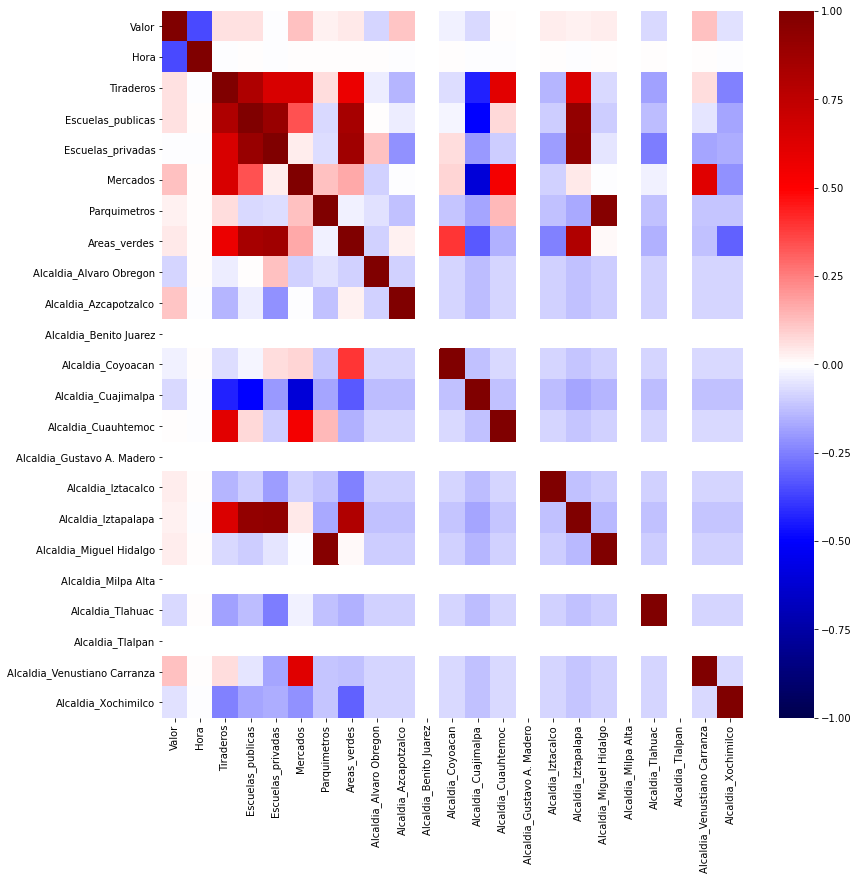

In [17]:
plt.figure(figsize=(13,13))
sns.heatmap(No.corr(),vmax=1,vmin=-1,cmap='seismic')
plt.show()

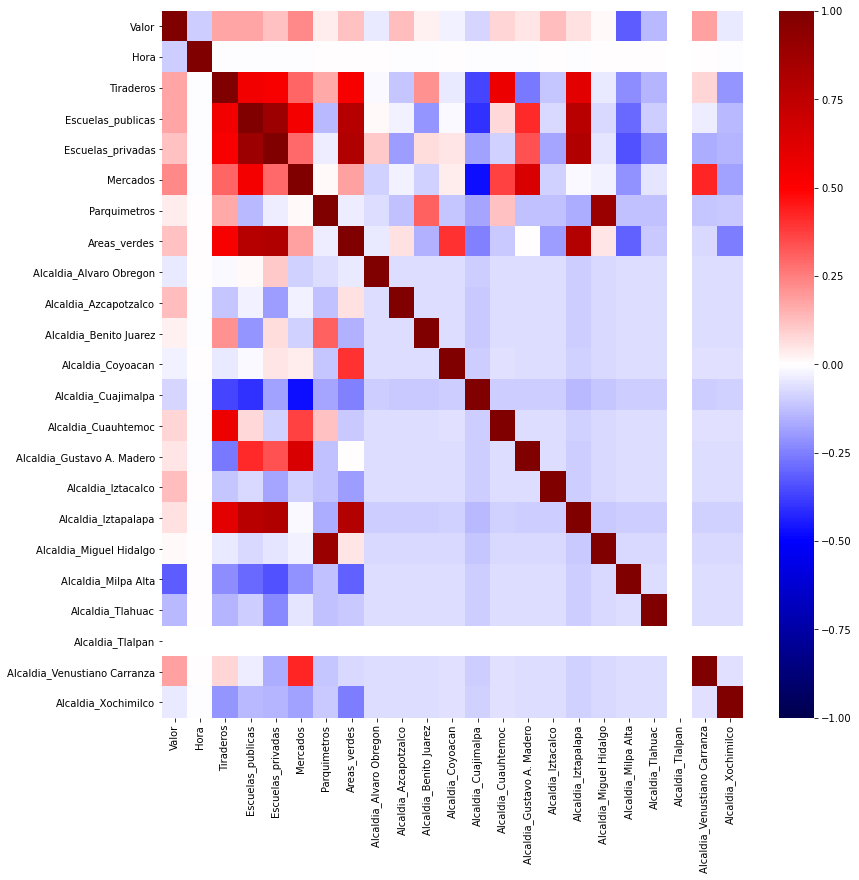

In [18]:
plt.figure(figsize=(13,13))
sns.heatmap(No2.corr(),vmax=1,vmin=-1,cmap='seismic')
plt.show()

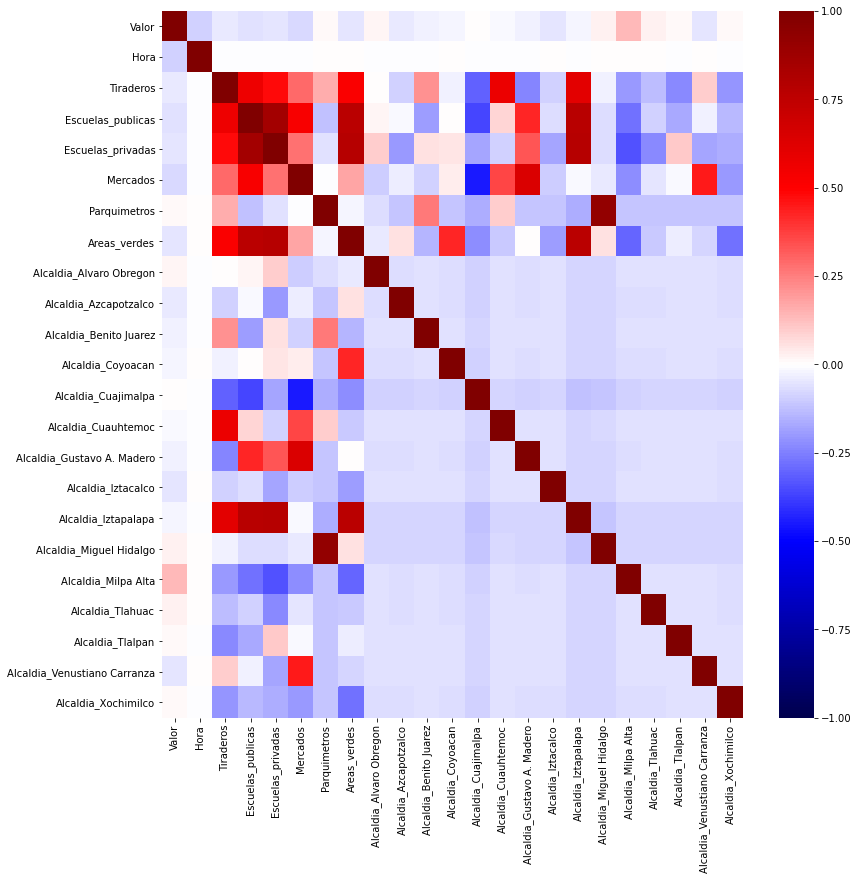

In [19]:
plt.figure(figsize=(13,13))
sns.heatmap(O3.corr(),vmax=1,vmin=-1,cmap='seismic')
plt.show()

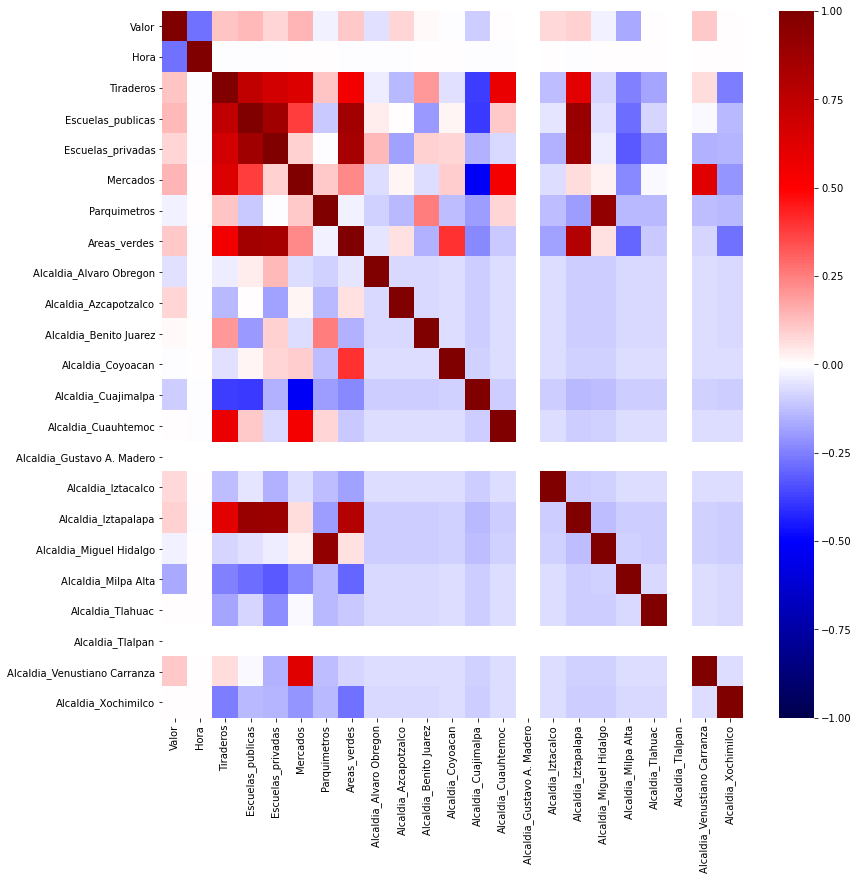

In [20]:
plt.figure(figsize=(13,13))
sns.heatmap(Co.corr(),vmax=1,vmin=-1,cmap='seismic')
plt.show()

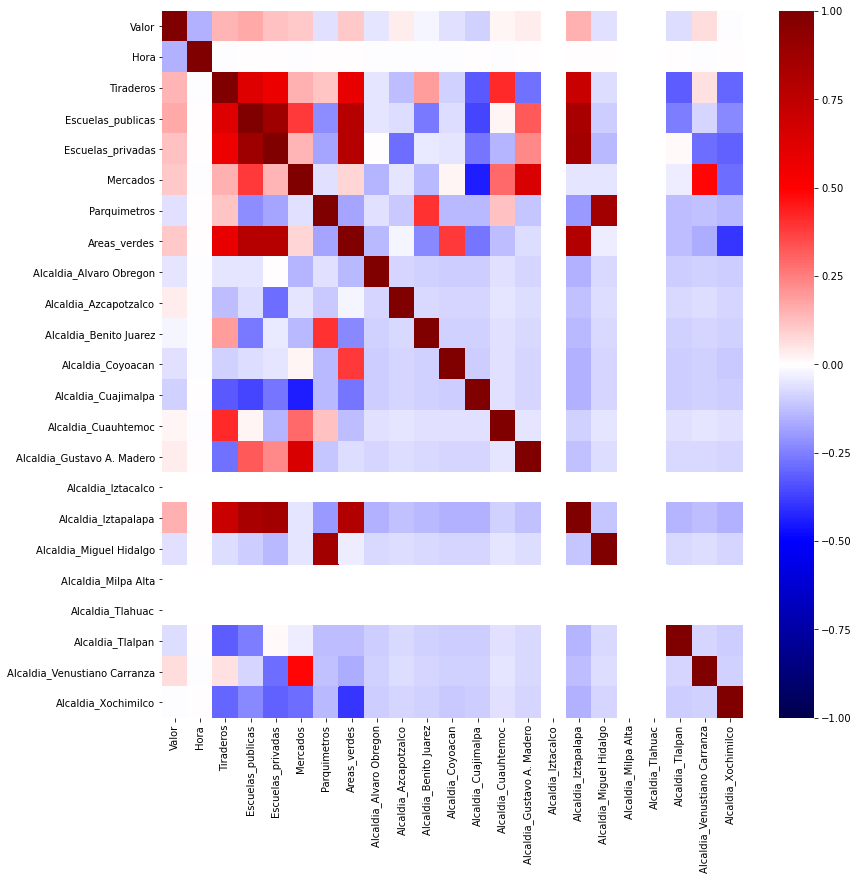

In [21]:
plt.figure(figsize=(13,13))
sns.heatmap(Pm5.corr(),vmax=1,vmin=-1,cmap='seismic')
plt.show()

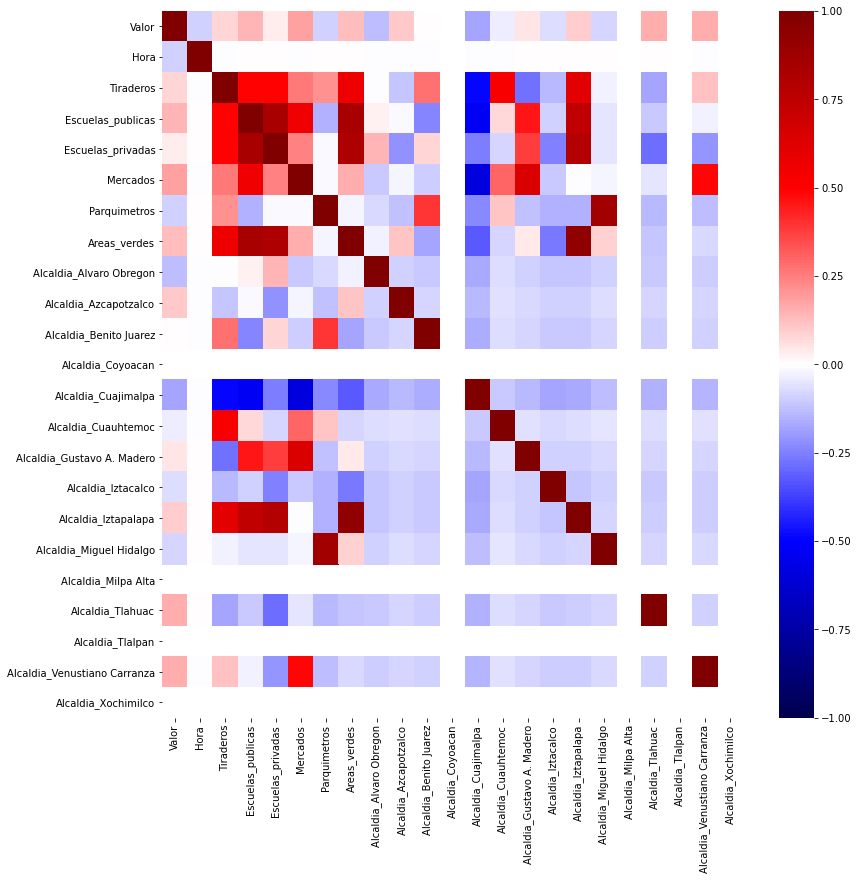

In [22]:
plt.figure(figsize=(13,13))
sns.heatmap(Pm10.corr(),vmax=1,vmin=-1,cmap='seismic')
plt.show()

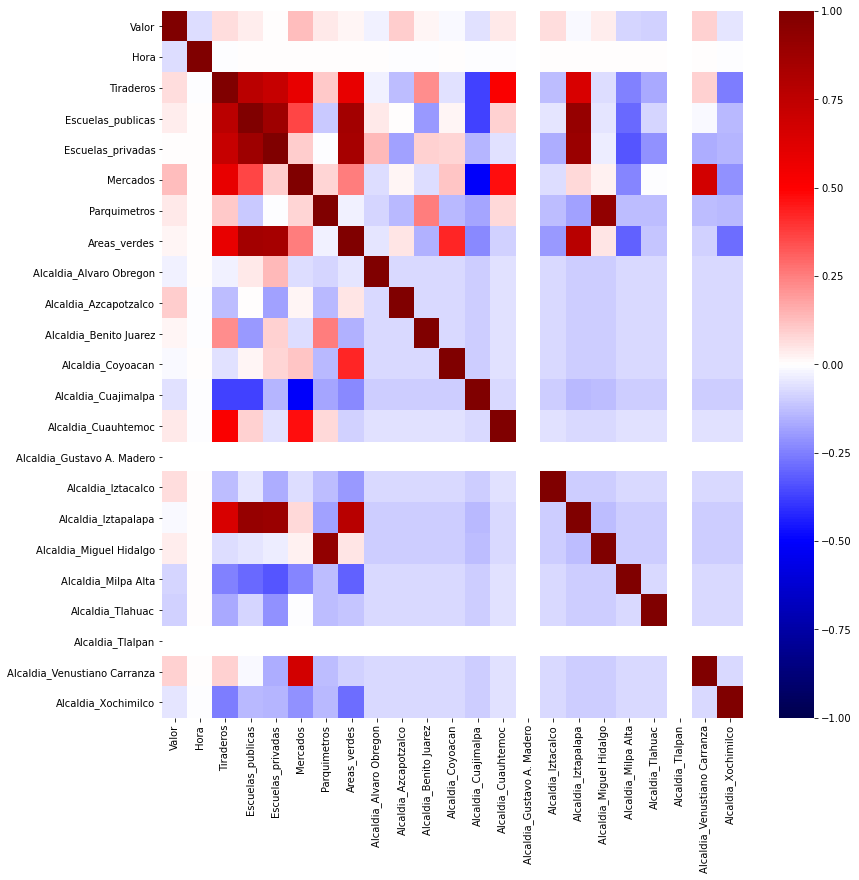

In [23]:
plt.figure(figsize=(13,13))
sns.heatmap(So2.corr(),vmax=1,vmin=-1,cmap='seismic')
plt.show()

----
<a name="E5"></a>
## Creando Modelo

In [24]:
print("Evaluando Modelo de Regresión para NO (Óxido nítrico)")
No_cols = No.drop('Valor',axis=1).columns
Best_MAE_regression(No_cols, No)

Evaluando Modelo de Regresión para NO (Óxido nítrico)
Evaluando features....
-------------------
ERROR
MSE: 652.0537972676368


[]

In [25]:
print("Evaluando Modelo de Regresión para CO (Monoxido de carbono)")
Co_cols = Co.drop('Valor',axis=1).columns
Best_MAE_regression(Co_cols, Co)

Evaluando Modelo de Regresión para CO (Monoxido de carbono)
Evaluando features....

El mejor modelo fue usando las features: Index(['Hora'], dtype='object')

Se eliminaron 21 features: ['Tiraderos', 'Escuelas_publicas', 'Escuelas_privadas', 'Mercados', 'Parquimetros', 'Areas_verdes', 'Alcaldia_Alvaro Obregon', 'Alcaldia_Azcapotzalco', 'Alcaldia_Benito Juarez', 'Alcaldia_Coyoacan', 'Alcaldia_Cuajimalpa', 'Alcaldia_Cuauhtemoc', 'Alcaldia_Gustavo A. Madero', 'Alcaldia_Iztacalco', 'Alcaldia_Iztapalapa', 'Alcaldia_Miguel Hidalgo', 'Alcaldia_Milpa Alta', 'Alcaldia_Tlahuac', 'Alcaldia_Tlalpan', 'Alcaldia_Venustiano Carranza', 'Alcaldia_Xochimilco']

Con un MSE: 0.11506546190076568


Index(['Hora'], dtype='object')

In [26]:

print("Evaluando Modelo de Regresión para Pm5 (Partículas menores a 2.5 micrómetros)")
Pm5_cols = Pm5.drop('Valor',axis=1).columns
Best_MAE_regression(Pm5_cols, Pm5)

Evaluando Modelo de Regresión para Pm5 (Partículas menores a 2.5 micrómetros)
Evaluando features....
-------------------
ERROR
MSE: 136.71212526368313


[]

In [27]:
print("Evaluando Modelo de Regresión para Pm5 (Partículas menores a 10 micrómetros)")
Pm10_cols = Pm10.drop('Valor',axis=1).columns
Best_MAE_regression(Pm10_cols, Pm10)

Evaluando Modelo de Regresión para Pm5 (Partículas menores a 10 micrómetros)
Evaluando features....
-------------------
ERROR
MSE: 532.7282051661696


[]

In [28]:
print("Evaluando Modelo de Regresión para So2 (Dióxido de azufre)")
So2_cols = So2.drop('Valor',axis=1).columns
Best_MAE_regression(So2_cols, So2)

Evaluando Modelo de Regresión para So2 (Dióxido de azufre)
Evaluando features....
-------------------
ERROR
MSE: 41.182788406312305


[]

In [29]:
print("Evaluando Modelo de Regresión para O3 (Ozono)")
O3_cols = O3.drop('Valor',axis=1).columns
Best_MAE_regression(O3_cols, O3)

Evaluando Modelo de Regresión para O3 (Ozono)
Evaluando features....
-------------------
ERROR
MSE: 757.165038391506


[]

In [30]:
print("Evaluando Modelo de Regresión para O3 (Ozono)")
No2_cols = No2.drop('Valor',axis=1).columns
Best_MAE_regression(No2_cols, No2)

Evaluando Modelo de Regresión para O3 (Ozono)
Evaluando features....
-------------------
ERROR
MSE: 183.64075215663613


[]

### Evaluando cantidades promedios por Delegación

In [21]:
join_data = pd.read_csv('Data_prep.csv')
join_data

,Alcaldia,Tiraderos,Escuelas_publicas,Escuelas_privadas,Mercados,Parquimetros,Areas_verdes,Estacion_climatologica,Dióxido de azufre,Dióxido de nitrógeno,Monóxido de carbono,Ozono,Partículas menores a 10 micrómetros,Partículas menores a 2.5 micrómetros,Óxido nítrico
0,Benito Juarez,147,68,294,16,640,484,1,4.878558,24.420703,0.373232,27.691118,44.321968,19.178871,10.224626
1,Tlahuac,35,120,103,18,0,581,1,6.571570,15.921218,0.502914,34.260996,56.711430,22.918176,NaN
2,Xochimilco,12,95,149,11,0,196,1,NaN,NaN,NaN,32.722538,NaN,NaN,NaN
3,Tlalpan,2,78,325,20,0,735,1,3.190341,32.921460,0.363654,32.467337,NaN,19.595080,NaN
4,Venustiano Carranza,109,150,140,42,0,634,1,NaN,20.365634,NaN,25.872162,NaN,NaN,NaN
5,Milpa Alta,13,28,32,10,0,130,1,5.391106,6.654957,0.433097,45.713324,50.661931,21.590857,24.644358
6,Miguel Hidalgo,69,137,223,19,1382,925,1,2.299615,23.255269,0.137046,33.112762,NaN,NaN,6.655389
7,Iztapalapa,219,439,636,20,0,2129,1,4.963212,25.067006,0.330778,29.799185,36.472839,17.071155,19.736722
8,Azcapotzalco,47,156,126,19,0,960,1,6.837696,29.333492,0.461790,26.654926,53.044863,21.561505,22.885823
9,Cuajimalpa,5,35,172,5,0,448,1,3.350986,19.940796,0.268715,31.251996,39.920000,16.351495,13.150933


De acuerdo al IMECA, categorizaremos nuestros resultados con respecto a sus contaminantes.

Satisfactorio = 1
No Satisfactorio = 0

Satisfactorio < 100
No satisfactorio > 100

In [22]:
def categoria_ozono(dataframe):
    cat_ozono = []
    for i in range(len(dataframe)):
        if str(join_data['Ozono'][i]) != "nan":
            imecao3 = (join_data['Ozono'][i]) / 0.11
            if imecao3 < 100:
                cat_ozono.append(1)
            
            if imecao3 > 100:
                cat_ozono.append(0)
        else:
            cat_ozono.append(0)
    return cat_ozono

In [23]:
def categoria_nitrogeno(dataframe):
    cat = []
    for i in range(len(dataframe)):
        if str(join_data['Dióxido de nitrógeno'][i]) != "nan":
            imecaco = (join_data['Dióxido de nitrógeno'][i]) / 0.21
            if imecaco < 100:
                cat.append(1)
            
            if imecaco > 100:
                cat.append(0)
        else:
            cat.append(0)
    return cat

In [24]:
def categoria_carbono(dataframe):
    cat = []
    for i in range(len(dataframe)):
        if str(join_data['Monóxido de carbono'][i]) != "nan":
            imecaco = (join_data['Monóxido de carbono'][i] * 100 ) / 11
            if imecaco < 100:
                cat.append(1)
            
            if imecaco > 100:
                cat.append(0)
        else:
            cat.append(0)
    return cat

In [25]:
def categoria_particulas(dataframe):
    cat = []
    for i in range(len(dataframe)):
        if str(join_data['Partículas menores a 10 micrómetros'][i]) != "nan":
            Pm10 = join_data['Partículas menores a 10 micrómetros'][i]
            if Pm10 <= 120:
                imecapm10 = Pm10 * 0.833
            elif Pm10 >= 121 and Pm10 <= 320:
                imecapm10 = (Pm10 * 0.5) + 40
            elif Pm10 > 320:
                imecapm10 = Pm10 * 0.625
            if imecapm10 < 100:
                cat.append(1)
            
            if imecapm10 > 100:
                cat.append(0)
        else:
            cat.append(0)
    return cat

In [26]:
def categoria_azufre(dataframe):
    cat = []
    for i in range(len(dataframe)):
        if str(join_data['Dióxido de azufre'][i]) != "nan":
            imecao3 = (join_data['Dióxido de azufre'][i]) / 0.13
            if imecao3 < 100:
                cat.append(1)
            
            if imecao3 > 100:
                cat.append(0)
        else:
            cat.append(0)
    return cat

In [27]:
ozono = categoria_ozono(join_data)
nitrogeno = categoria_nitrogeno(join_data)
azufre = categoria_azufre(join_data)
particulas = categoria_particulas(join_data)
carbono = categoria_carbono(join_data)
new_indice = [ozono, nitrogeno, azufre, particulas, carbono]
new_indice = pd.DataFrame(ozono, columns=['ozono'])
new_indice['nitrogeno'] = nitrogeno
new_indice['azufre'] = azufre
new_indice['particulas'] = particulas
new_indice['carbono'] = carbono

In [28]:
cat_total =[]
for i in range(len(new_indice)):
    suma = (new_indice['ozono'][i] + new_indice['nitrogeno'][i] + 
           new_indice['azufre'][i] + new_indice['particulas'][i] +
           new_indice['carbono'][i])
    cat = suma/5
    if cat < 0.5:
        cat_total.append(0)
    else:
        cat_total.append(1)

In [29]:
join_data['Categoria'] = cat_total
join_data = join_data.fillna(0)

In [30]:
join_data = join_data.drop('Estacion_climatologica',axis=1)

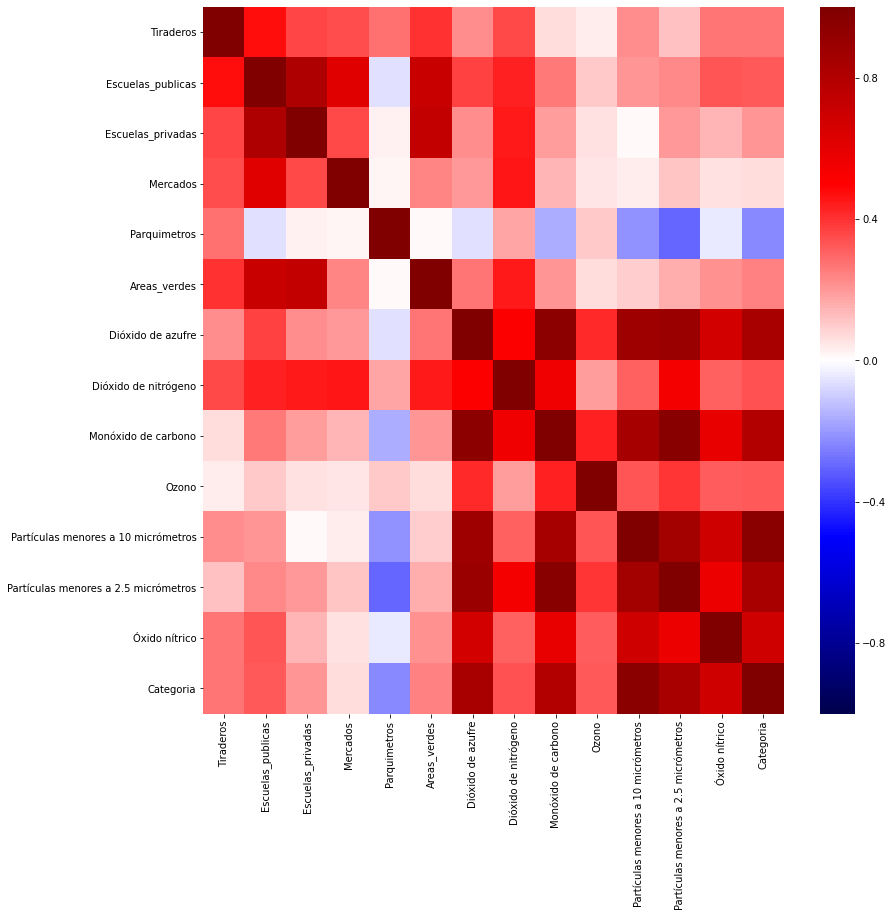

In [32]:
plt.figure(figsize=(13,13))
sns.heatmap(join_data.corr(),vmax=1,vmin=-1,cmap='seismic')
plt.show()

In [35]:
print("Evaluando Modelo de Regresión")
join_cols = join_data.drop(['Categoria','Alcaldia'],axis=1).columns
Best_MAE_regression(join_cols, join_data, var='Categoria')

Evaluando Modelo de Regresión
Evaluando features....

El mejor modelo fue usando las features: Index(['Escuelas_publicas', 'Escuelas_privadas', 'Mercados', 'Parquimetros',
       'Areas_verdes', 'Dióxido de azufre', 'Dióxido de nitrógeno',
       'Monóxido de carbono', 'Ozono', 'Partículas menores a 10 micrómetros'],
      dtype='object')

Se eliminaron 3 features: ['Tiraderos', 'Partículas menores a 2.5 micrómetros', 'Óxido nítrico']

Con un MSE: 0.024531874966405912


Index(['Escuelas_publicas', 'Escuelas_privadas', 'Mercados', 'Parquimetros',
       'Areas_verdes', 'Dióxido de azufre', 'Dióxido de nitrógeno',
       'Monóxido de carbono', 'Ozono', 'Partículas menores a 10 micrómetros'],
      dtype='object')

In [37]:
X =  join_data.drop(["Alcaldia","Tiraderos"
                     ,'Mercados','Parquimetros',
                     'Partículas menores a 2.5 micrómetros', 
                     'Óxido nítrico',"Categoria"], axis = 1)
y = join_data["Categoria"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, 
                                                    random_state=42, stratify=y)

In [40]:
dtree = DecisionTreeClassifier()
model = dtree.fit(X_train, y_train)

importances = model.feature_importances_
feat_names = join_data.drop(["Categoria","Alcaldia","Tiraderos",'Mercados'
                             ,'Parquimetros','Partículas menores a 2.5 micrómetros', 
                             'Óxido nítrico',"Categoria"], axis=1).columns
indexes = np.argsort(importances)[::-1]

In [43]:
print('Importancia: ',importances)
print('Atributos: ',feat_names)
print('Índices: ',indexes)

Importancia:  [0. 0. 0. 0. 0. 0. 0. 1.]
Atributos:  Index(['Escuelas_publicas', 'Escuelas_privadas', 'Areas_verdes',
       'Dióxido de azufre', 'Dióxido de nitrógeno', 'Monóxido de carbono',
       'Ozono', 'Partículas menores a 10 micrómetros'],
      dtype='object')
Índices:  [7 6 5 4 3 2 1 0]


In [49]:
logreg = LogisticRegression(solver="liblinear", random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [50]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [51]:
print(logreg.intercept_)
print(logreg.coef_)
print(X_train.columns)   

[-0.03332131]
[[ 0.0496147  -0.04061821 -0.00055584  0.0531255  -0.07336161  0.0039587
  -0.15196803  0.45859417]]
Index(['Escuelas_publicas', 'Escuelas_privadas', 'Areas_verdes',
       'Dióxido de azufre', 'Dióxido de nitrógeno', 'Monóxido de carbono',
       'Ozono', 'Partículas menores a 10 micrómetros'],
      dtype='object')


In [52]:
def validate_cont(esc_pub, esc_priv, areas_verdes, azufre,
       nitrogeno, carbono, ozono, particulas_10):
    comb = (logreg.intercept_ + logreg.coef_[0][0]*esc_pub +
            logreg.coef_[0][1]*esc_priv + logreg.coef_[0][2]*areas_verdes + 
            logreg.coef_[0][3]*azufre + logreg.coef_[0][4]*nitrogeno + 
            logreg.coef_[0][5]*carbono + logreg.coef_[0][6]*ozono + logreg.coef_[0][7]*particulas_10)
            
    return 1/(1+np.exp(-comb))

In [53]:
def etiqueta_predict(num_validate):
    if num_validate > 0.5:
        return "Satisfactorio"
    else:
        return "No Satisfactorio"

In [54]:
result = []
for i in range(len(join_data)):
    result_ind = etiqueta_predict(validate_cont(join_data['Escuelas_publicas'][i],
                                                join_data['Escuelas_privadas'][i],join_data['Areas_verdes'][i],
                                                join_data['Dióxido de azufre'][i],join_data['Dióxido de nitrógeno'][i],
                                                join_data['Monóxido de carbono'][i],join_data['Ozono'][i], 
                                                join_data['Partículas menores a 10 micrómetros'][i]))
    result.append(result_ind)

In [56]:
join_data["Result_Predict"] = result
join_data

,Alcaldia,Tiraderos,Escuelas_publicas,Escuelas_privadas,Mercados,Parquimetros,Areas_verdes,Dióxido de azufre,Dióxido de nitrógeno,Monóxido de carbono,Ozono,Partículas menores a 10 micrómetros,Partículas menores a 2.5 micrómetros,Óxido nítrico,Categoria,Result_Predict
0,Benito Juarez,147,68,294,16,640,484,4.878558,24.420703,0.373232,27.691118,44.321968,19.178871,10.224626,1,Satisfactorio
1,Tlahuac,35,120,103,18,0,581,6.571570,15.921218,0.502914,34.260996,56.711430,22.918176,0.000000,1,Satisfactorio
2,Xochimilco,12,95,149,11,0,196,0.000000,0.000000,0.000000,32.722538,0.000000,0.000000,0.000000,0,No Satisfactorio
3,Tlalpan,2,78,325,20,0,735,3.190341,32.921460,0.363654,32.467337,0.000000,19.595080,0.000000,0,No Satisfactorio
4,Venustiano Carranza,109,150,140,42,0,634,0.000000,20.365634,0.000000,25.872162,0.000000,0.000000,0.000000,0,No Satisfactorio
5,Milpa Alta,13,28,32,10,0,130,5.391106,6.654957,0.433097,45.713324,50.661931,21.590857,24.644358,1,Satisfactorio
6,Miguel Hidalgo,69,137,223,19,1382,925,2.299615,23.255269,0.137046,33.112762,0.000000,0.000000,6.655389,0,No Satisfactorio
7,Iztapalapa,219,439,636,20,0,2129,4.963212,25.067006,0.330778,29.799185,36.472839,17.071155,19.736722,1,Satisfactorio
8,Azcapotzalco,47,156,126,19,0,960,6.837696,29.333492,0.461790,26.654926,53.044863,21.561505,22.885823,1,Satisfactorio
9,Cuajimalpa,5,35,172,5,0,448,3.350986,19.940796,0.268715,31.251996,39.920000,16.351495,13.150933,1,Satisfactorio


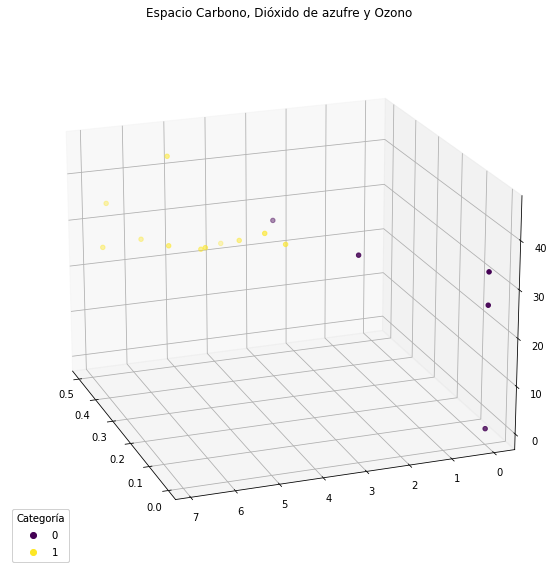

In [64]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(join_data["Monóxido de carbono"], join_data["Dióxido de azufre"], join_data["Ozono"], c=logreg.predict(X.values))
legend = ax.legend(*scatter.legend_elements(), loc="lower left", title="Categoría")
plt.title("Espacio Carbono, Dióxido de azufre y Ozono")
ax.add_artist(legend)
ax.view_init(20,160)
fig.savefig("Usuarios_3d.png",transparent=True)